In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [29]:
# Convert field names to dict for easy access.
# Can be hard coded 
# 
fields_path = '../../input/training_validation_2/fields.csv'  
fields_df = pd.read_csv(fields_path)
fields_df.columns = ['name', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

fields_dict = {}
fields_dictv2 = {}

for idx in range(fields_df.shape[0]):
    name = fields_df.loc[idx, 'name']

    _fields = []
    
    for f in fields_df.columns[1:]:
        if not (str(fields_df.loc[idx, f]) == 'nan'):
            _fields.append(name + "_" + str(fields_df.loc[idx, f]))
    
    fields_dict[idx] = {'name': fields_df.loc[idx, 'name'] , 'fields': _fields}
    fields_dictv2[name] = _fields
    
# fields_dict

In [30]:
feature_list = [fields_dict[45]['name']]
feature_list_regex= "|".join(["^"+f+"_" for f in feature_list])

feature_list

['Vacuum']

In [31]:
# import data
data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
merged_df = pd.concat([data_df_1, data_df_2], axis=0) # Merge data frames


In [32]:
train_df = merged_df.filter(regex=feature_list_regex)
# train_df = train_df.filter(regex="vCnt|value")
# train_df = data_df_2.filter(regex="^Temperature")

In [33]:
train_df.head()

,Vacuum_vCnt,Vacuum_vFreq,Vacuum_vMax,Vacuum_vMin,Vacuum_vStd,Vacuum_vTrend,Vacuum_value
0,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,90,8.919306,-0.001923,-0.722648,0.172948,-0.001585,-0.518459
2,93,9.200108,-0.157201,-0.728507,0.130021,0.000703,-0.516734
3,91,9.055755,-0.161596,-0.745598,0.142374,-0.002064,-0.504100
4,91,9.056153,-0.154271,-0.732902,0.136722,-0.000434,-0.532497


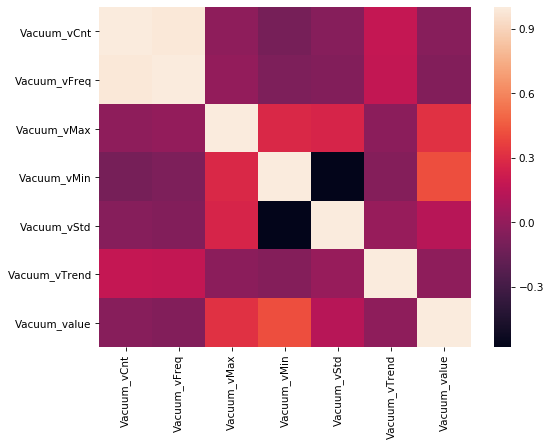

In [34]:
fig = plt.figure(figsize=(8,6), dpi=75)
sns.heatmap(train_df.corr(),annot=False)

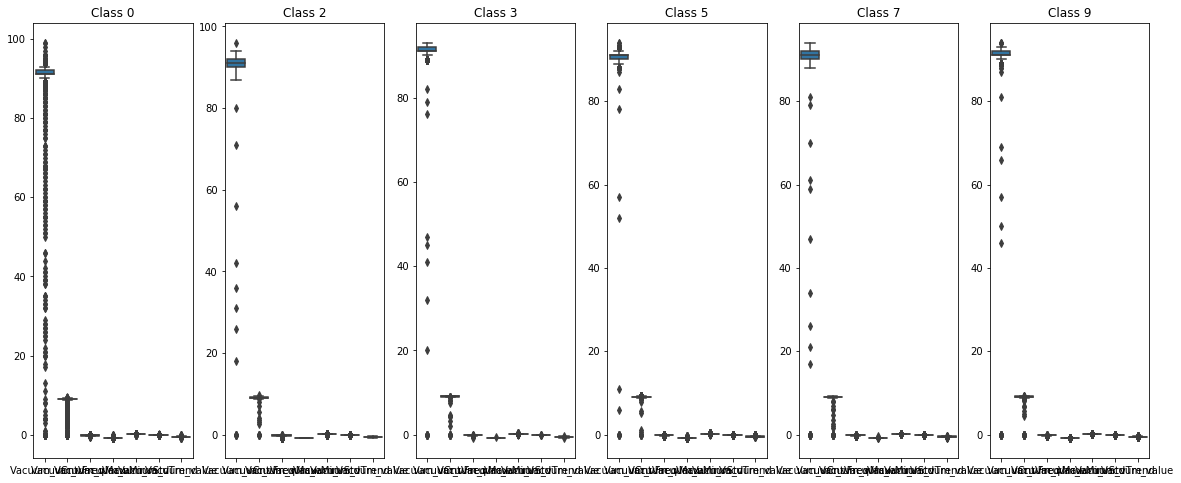

In [36]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = merged_df['class'].unique()

fig, axes = plt.subplots(1, len(classes), sharex=True, figsize=(20,8))
# fig.suptitle('1 row x 2 columns axes with no data')

for idx, c in enumerate(classes):
    df = train_df[merged_df['class'] == c].copy()
#     df = train_df.copy()
    sns.boxplot(data=df, ax=axes[idx])
    axes[idx].set_title('Class '+str(c))


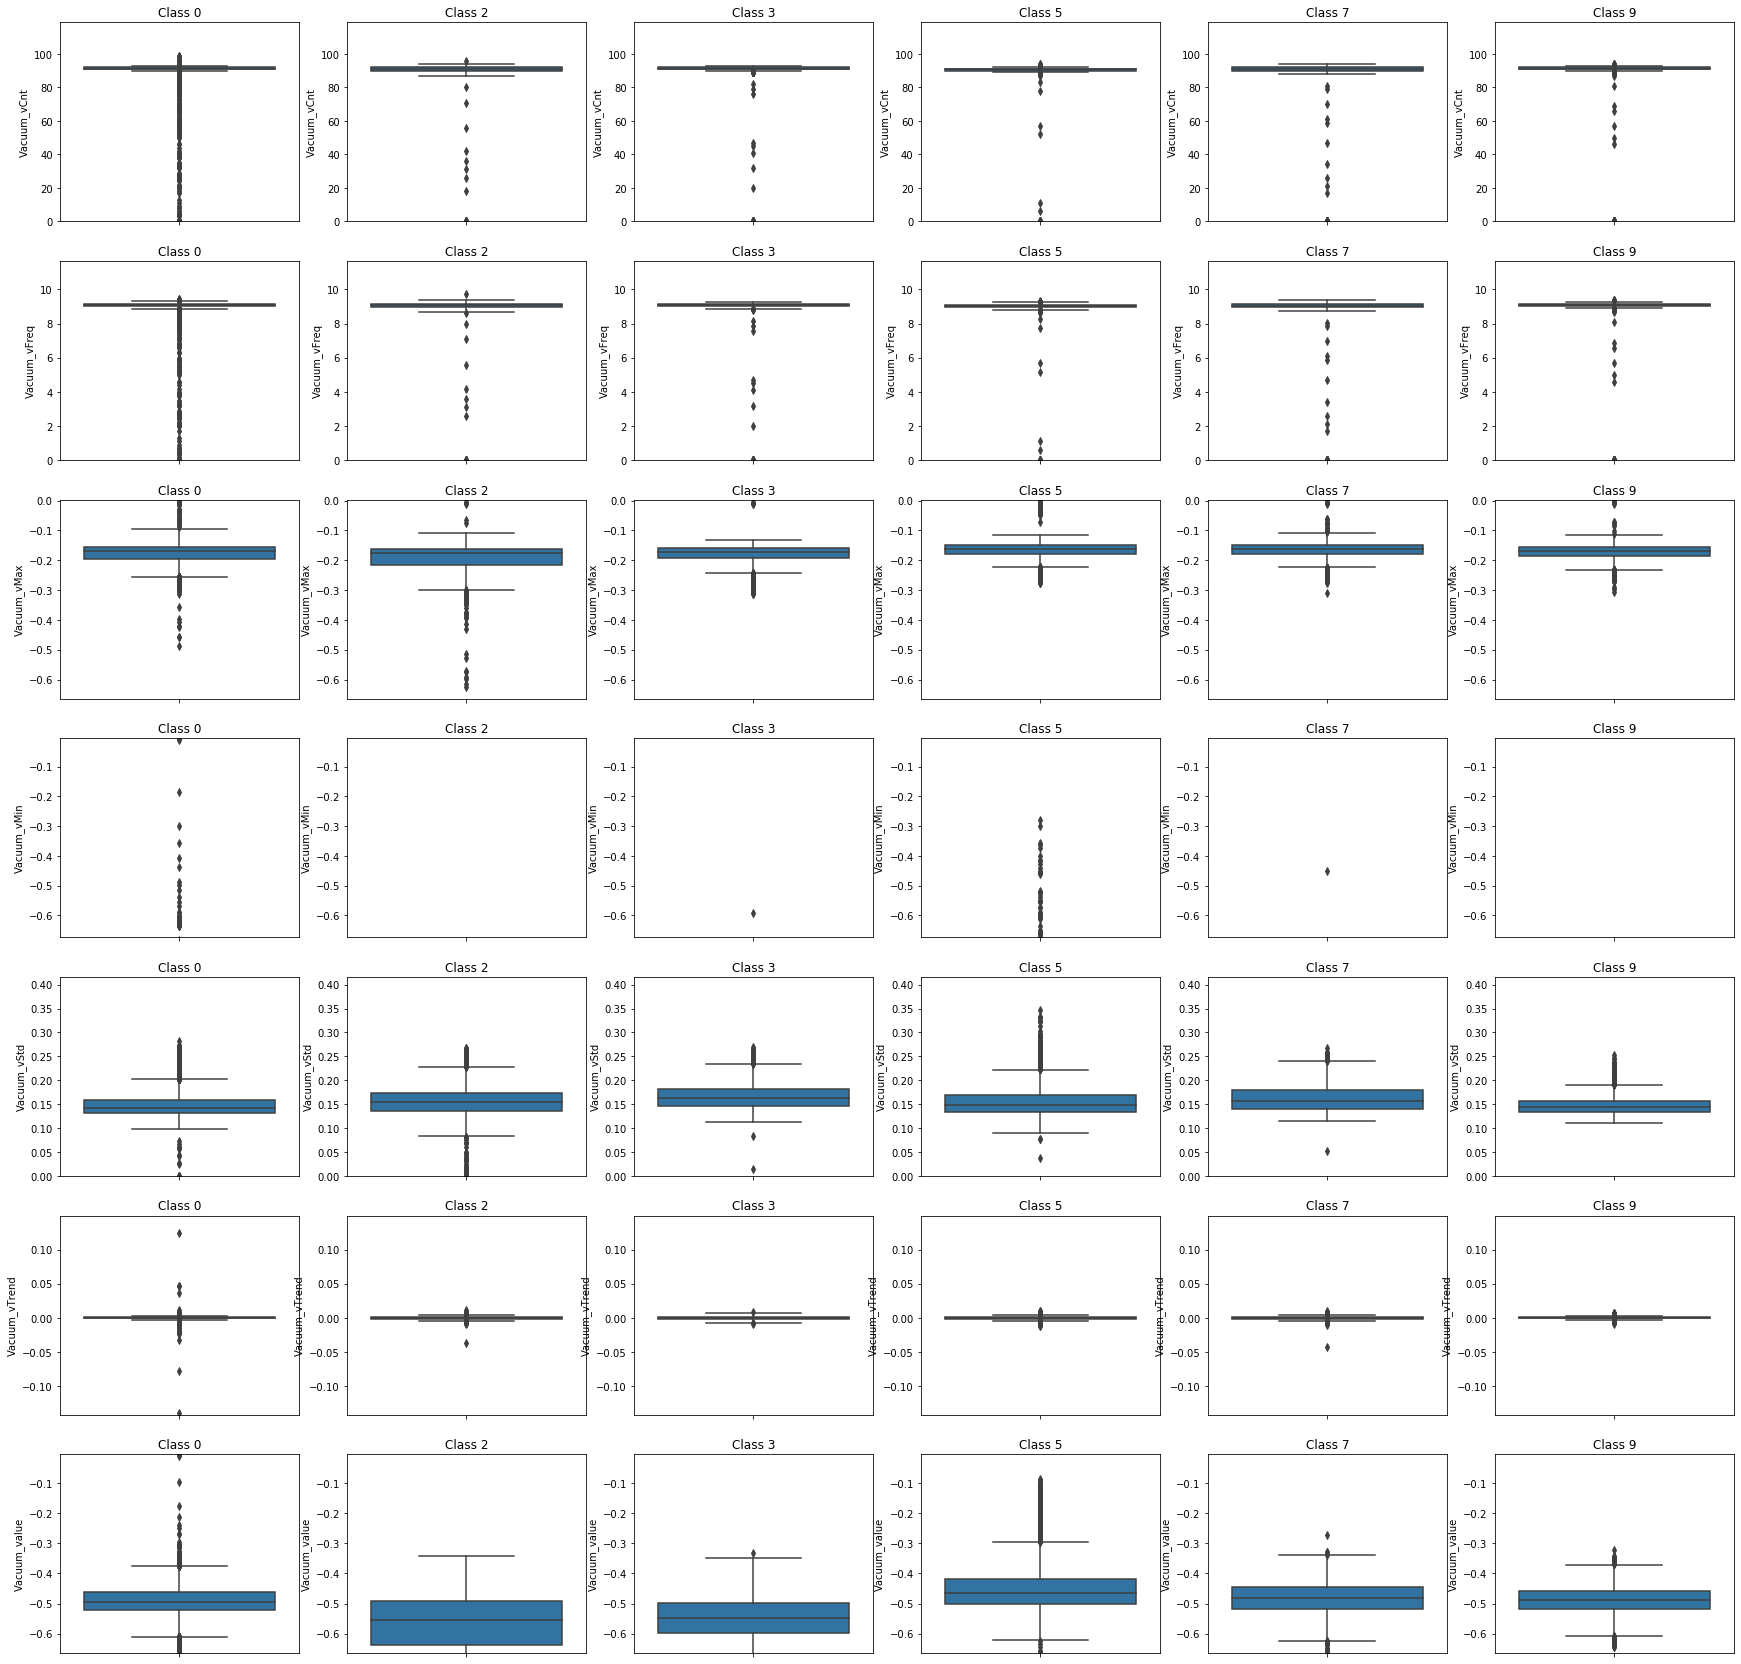

In [37]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()
features = train_df.columns

fig, axes = plt.subplots(len(features), len(classes), sharex=True, figsize=(30,30))
# print (axes)
# fig.suptitle('1 row x 2 columns axes with no data')

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()
#         print (f, c, df2.columns)
        sns.boxplot(y=df2[f], ax=axes[idx1, idx2])
        axes[idx1, idx2].set_title('Class '+str(c))
        axes[idx1, idx2].set_ylim(0.8*df[f].min(), 1.2*df[f].max())


In [38]:
# classes = data_df_2['class'].unique()
# features = train_df.columns

# fig, axes = plt.subplots(len(features), 1, sharex=True, figsize=(30,16))

# for idx1, f in enumerate(features):
#     df = data_df_2[[f, 'class']].copy()
#     axes[idx1].set_title('Feature '+str(f))
#     for idx2, c in enumerate(classes):
#         df2 = df[df['class'] == c].copy()
#         axes[idx1].boxplot(x=df2[f], positions=[idx2], labels=[c])
    


In [39]:
# train_df2 = pd.concat([data_df_2['class'], train_df], axis=1)
# axes = train_df2.groupby('class').boxplot(figsize=(20, 10))

In [40]:
classes = data_df_2['class'].unique()
features = train_df.columns

new_df = pd.DataFrame()

df_list = []

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    data = [[
        99, f, df[f].max(), df[f].min(), df[f].std(), df[f].mean(), df[f].median(), df[f].count(), df[f].isna().sum(),
        ]]

    data_df = pd.DataFrame(data)

    df_list.append(data_df)

    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()

        data = [[
            c, f, df2[f].max(), df2[f].min(), df2[f].std(), df2[f].mean(), df2[f].median(), df2[f].count(), df2[f].isna().sum(),
            ]]
        
        data_df = pd.DataFrame(data)
        df_list.append(data_df)
        
new_df = pd.concat(df_list, axis=0)
        
new_df.columns = ['class', 'feature', 'max', 'min', 'std', 'mean', 'median', 'Count', 'NA_count']

In [41]:
new_df[new_df['class']==99]

,class,feature,max,min,std,mean,median,Count,NA_count
0,99,Vacuum_vCnt,99.000000,0.000000,6.856063,90.577996,91.000000,39611,0
0,99,Vacuum_vFreq,9.717708,0.000000,0.677397,9.014545,9.065217,39611,0
0,99,Vacuum_vMax,0.002228,-0.830073,0.053469,-0.177873,-0.168920,39435,176
0,99,Vacuum_vMin,-0.003876,-0.842769,0.029391,-0.756091,-0.749992,39435,176
0,99,Vacuum_vStd,0.346455,0.000000,0.027823,0.151619,0.145778,39435,176
0,99,Vacuum_vTrend,0.124564,-0.176861,0.002608,-0.000017,-0.000009,39433,178
0,99,Vacuum_value,-0.003332,-0.832037,0.066880,-0.496435,-0.496625,39435,176


In [42]:
missing = 0

for c in classes:
    class_df = merged_df[merged_df['class']==c]
    runs = class_df['run'].unique()
    for r in runs:
        run_df = class_df[class_df['run'] == r]
        for f in features:
            f_df = run_df.filter([f]).copy().reset_index()
            del f_df['index']
            l = len(f_df)
            n_df = f_df[f_df[f].isna()]
#             if len(f_df) != len(n_df): print (c, r, f, len(f_df), len(n_df))
            if (len(n_df) == 0): continue
            missing += len(n_df)
            for i in list(n_df.index):
                if ((i == 0) | (i == l-1)): 
                    print ('NA at start or end')
                else:
                    print (c, r, f, len(f_df), list(n_df.index))
print (missing)

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 1 Vacuum_vMax 363 [0, 1, 362]
NA at start or end
NA at start or end
0 1 Vacuum_vMin 363 [0, 1, 362]
NA at start or end
NA at

0 74 Vacuum_vMax 360 [358, 359]
NA at start or end
0 74 Vacuum_vMin 360 [358, 359]
NA at start or end
0 74 Vacuum_vStd 360 [358, 359]
NA at start or end
0 74 Vacuum_vTrend 360 [358, 359]
NA at start or end
0 74 Vacuum_value 360 [358, 359]
NA at start or end
0 75 Vacuum_vMax 361 [359, 360]
NA at start or end
0 75 Vacuum_vMin 361 [359, 360]
NA at start or end
0 75 Vacuum_vStd 361 [359, 360]
NA at start or end
0 75 Vacuum_vTrend 361 [359, 360]
NA at start or end
0 75 Vacuum_value 361 [359, 360]
NA at start or end
0 76 Vacuum_vMax 358 [356, 357]
NA at start or end
0 76 Vacuum_vMin 358 [356, 357]
NA at start or end
0 76 Vacuum_vStd 358 [356, 357]
NA at start or end
0 76 Vacuum_vTrend 358 [356, 357]
NA at start or end
0 76 Vacuum_value 358 [356, 357]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 80 Vacuum_vMax 360 [358, 359]
NA a

7 0 Vacuum_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 Vacuum_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 Vacuum_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
7 0 Vacuum_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 369]
NA at start or end
NA at start or end
7 2 Vacuum_vMax 1080 [0, 1, 2, 1079]
7 2 Vacuum_vMax 1080 [0, 1, 2, 1079]
NA at start or end
NA at start or end
7 2 Vacuum_vMin 1080 [0, 1, 2, 1079]
7 2 Vacuum_vMin 1080 [0, 1, 2, 1079]
NA at start or end
NA at start or end
7 2 Vacuum_vStd 1080 [0, 1, 2, 1079]
7 2 Vacuum_vStd 1080 [0, 1, 2, 1079]
NA at start or end
NA at start or end
7 2 Vacuum_vTrend 1080 [0, 1, 2, 1079]
7 2 Vacuum_vTrend 1080 [0, 1, 2, 1079]
NA at start or end
NA at start or end
7 2 Vacuum_value 1080 [0, 1, 2, 1079]
7 2 Vacuum_value 1080 [0, 1, 2, 1079]
NA at start or end
NA at start or end
7 3 Vacuum_vMax 1079 [0, 1, 2, 1078]
7 3 Vacuum_vMax 1079 [0, 1, 2, 1078]
NA at start or end
NA at start or end
7 3 Vacuum_vMin 1079 [0, 1, 2, 1078]
7 3 Vacuum_vMin 1079 [0, 1, 2, 